In [1]:
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
# import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

## Import analysis functions

In [2]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

In [3]:
plt.close('all')

In [4]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


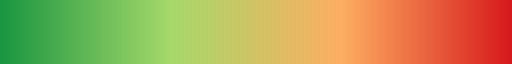

In [5]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [6]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
onedrive = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory'
cwd = '/data_processing/20240625_OAm'
subfolder = glob.glob(onedrive + cwd + '/**Cs**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_000_Tol_1500
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_010_Tol_1550
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_020_Tol_1600
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_030_Tol_1650
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_050_Tol_1700
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_125_OAm_025_Tol_1700
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_0

## Data acquisition method

In [7]:
# acquisition_method = 'BlueSky'
acquisition_method = 'OceanView'

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [8]:
if acquisition_method == 'BlueSky':
    skiprows = 8  ## skip 23 rows if data processed by dioptas or ## 8
elif acquisition_method == 'OceanView':
    skiprows = 14

df = pd.DataFrame()
# quinine_con = ['1E-4M', '2E-4M', '3E-4M', '4E-4M', '5E-4M', '5E-3M']

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + f'/**Sub**.txt')
    data_files.sort()
    # del data_files[-1]
    # suffix = os.path.basename(subfolder[i])
    suffix = os.path.basename(subfolder[i])[14:30]
    # id0 = 8
    # id1 = 22

    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):
        if acquisition_method == 'OceanView':
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        elif acquisition_method == 'BlueSky':
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
            df_temp = pd.concat([df_temp, df_int['Fluorescence']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df[f'x_{suffix}'] = df_int['Wavelength']
    # df[f'{suffix}_mean'] = df_temp.mean(axis=1)
    
    ### Filter out bad fluorescence PL data due to PF oil ###
    x0 = df[f'x_{suffix}'].to_numpy()
    df[f'{suffix}_mean'] = percentile_PL(x0, df_temp.to_numpy().T, w_range=[400, 800], percent_range=[30, 100]).mean(axis=0)
    

In [9]:
len(data_files)

49

## Export average PL of quinine as a csv

In [10]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df.to_csv('20240227_quinine_PL.csv', index=False, sep=' ', float_format='{:.8e}'.format)

In [11]:
df

,x_ZnCl_100_OAm_000,ZnCl_100_OAm_000_mean,x_ZnCl_100_OAm_010,ZnCl_100_OAm_010_mean,x_ZnCl_100_OAm_020,ZnCl_100_OAm_020_mean,x_ZnCl_100_OAm_030,ZnCl_100_OAm_030_mean,x_ZnCl_100_OAm_050,ZnCl_100_OAm_050_mean,x_ZnCl_125_OAm_025,ZnCl_125_OAm_025_mean,x_ZnCl_133_OAm_017,ZnCl_133_OAm_017_mean,x_ZnCl_140_OAm_010,ZnCl_140_OAm_010_mean,x_ZnCl_150_OAm_000,ZnCl_150_OAm_000_mean
0,197.742,-0.669118,197.742,-0.602941,197.742,-0.776176,197.742,-0.823235,197.742,-0.628529,197.742,-0.592941,197.742,-0.477941,197.742,-0.491765,197.742,-0.746765
1,198.544,0.440000,198.544,0.472647,198.544,0.707647,198.544,0.145000,198.544,0.587353,198.544,0.469412,198.544,0.382941,198.544,0.527647,198.544,0.257059
2,199.347,0.289706,199.347,0.426471,199.347,0.847353,199.347,0.024118,199.347,0.515882,199.347,0.445000,199.347,0.348529,199.347,0.270000,199.347,0.076471
3,200.149,0.176765,200.149,0.228235,200.149,0.830294,200.149,-0.240000,200.149,0.332647,200.149,0.290588,200.149,0.073824,200.149,0.029118,200.149,-0.167059
4,200.951,0.478824,200.951,0.624118,200.951,1.293235,200.951,0.050882,200.951,0.697941,200.951,0.657059,200.951,0.489706,200.951,0.360882,200.951,0.186471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.770,-0.206176,990.770,-0.540588,990.770,-0.437941,990.770,-0.218529,990.770,-0.096176,990.770,-0.334412,990.770,-0.207353,990.770,-0.432941,990.770,-0.396765
1040,991.489,0.286176,991.489,0.124412,991.489,0.272353,991.489,0.364706,991.489,0.370294,991.489,0.270000,991.489,0.245882,991.489,0.159118,991.489,0.148235
1041,992.208,0.559118,992.208,0.283824,992.208,0.528824,992.208,0.597941,992.208,0.545000,992.208,0.430294,992.208,0.427353,992.208,0.368235,992.208,0.371471
1042,992.928,0.813824,992.928,0.587059,992.928,0.853235,992.928,0.942647,992.928,0.893529,992.928,0.827353,992.928,0.776176,992.928,0.755000,992.928,0.779118


## Check data in pd dataframe

In [12]:
df.keys()

Index(['x_ZnCl_100_OAm_000', 'ZnCl_100_OAm_000_mean', 'x_ZnCl_100_OAm_010',
       'ZnCl_100_OAm_010_mean', 'x_ZnCl_100_OAm_020', 'ZnCl_100_OAm_020_mean',
       'x_ZnCl_100_OAm_030', 'ZnCl_100_OAm_030_mean', 'x_ZnCl_100_OAm_050',
       'ZnCl_100_OAm_050_mean', 'x_ZnCl_125_OAm_025', 'ZnCl_125_OAm_025_mean',
       'x_ZnCl_133_OAm_017', 'ZnCl_133_OAm_017_mean', 'x_ZnCl_140_OAm_010',
       'ZnCl_140_OAm_010_mean', 'x_ZnCl_150_OAm_000', 'ZnCl_150_OAm_000_mean'],
      dtype='object')

In [13]:
df.shape

(1044, 18)

## Prepare keys for average scans in pd dataframe

In [14]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_ZnCl_100_OAm_000',
 'ZnCl_100_OAm_000_mean',
 'x_ZnCl_100_OAm_010',
 'ZnCl_100_OAm_010_mean',
 'x_ZnCl_100_OAm_020',
 'ZnCl_100_OAm_020_mean',
 'x_ZnCl_100_OAm_030',
 'ZnCl_100_OAm_030_mean',
 'x_ZnCl_100_OAm_050',
 'ZnCl_100_OAm_050_mean',
 'x_ZnCl_125_OAm_025',
 'ZnCl_125_OAm_025_mean',
 'x_ZnCl_133_OAm_017',
 'ZnCl_133_OAm_017_mean',
 'x_ZnCl_140_OAm_010',
 'ZnCl_140_OAm_010_mean',
 'x_ZnCl_150_OAm_000',
 'ZnCl_150_OAm_000_mean']

In [15]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

ZnCl_100_OAm_000_mean
ZnCl_100_OAm_010_mean
ZnCl_100_OAm_020_mean
ZnCl_100_OAm_030_mean
ZnCl_100_OAm_050_mean
ZnCl_125_OAm_025_mean
ZnCl_133_OAm_017_mean
ZnCl_140_OAm_010_mean
ZnCl_150_OAm_000_mean


## Plot all PL scans together

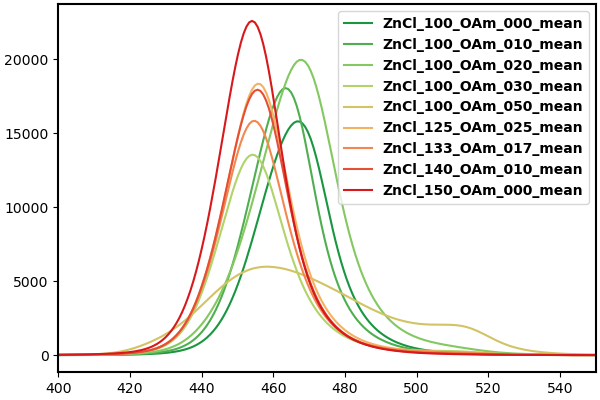

In [16]:
f1, ax1 = plt.subplots(1, 1, figsize = (6, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 23

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    # t = re.findall(r'\d+', title[i])[-1]
    ax1.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
        
legend_properties = {'weight':'bold', 'size':10}    
ax1.legend(prop=legend_properties)
# ax1[1].legend(prop=legend_properties)

ax1.set_xlim(400, 550)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [17]:
# new_dir = cwd + '/plqy'

# try:
#     os.mkdir(new_dir)
# except FileExistsError:
#     pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [18]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    # simpson_int.append(integrate.simpson(y, x))
    simpson_int.append(integrate.simpson(y))

df_simp = pd.DataFrame()
df_simp['Data_source'] = [title[i] for i in range(len(title))]
df_simp['Simpson_integrate'] = simpson_int
df_simp

,Data_source,Simpson_integrate
0,ZnCl_100_OAm_000_mean,530120.368725
1,ZnCl_100_OAm_010_mean,574873.766961
2,ZnCl_100_OAm_020_mean,767183.103333
3,ZnCl_100_OAm_030_mean,445481.208333
4,ZnCl_100_OAm_050_mean,452684.177157
5,ZnCl_125_OAm_025_mean,583605.534020
6,ZnCl_133_OAm_017_mean,506924.043627
7,ZnCl_140_OAm_010_mean,557641.168235
8,ZnCl_150_OAm_000_mean,689141.406275


## Save Simpson integrate of PL peak

In [19]:
# df_int.to_csv(os.path.join(new_dir, 'quinine_300ms_sapphire_simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [20]:
# df_int.to_csv('quinine_300ms_sapphire_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

## Find the subfolders in the current working folder (cwd)

In [21]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
onedrive = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory'
cwd = '/data_processing/20240625_OAm'
subfolder = glob.glob(onedrive + cwd + '/**Cs**')
subfolder.sort()
# # del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_000_Tol_1500
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_010_Tol_1550
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_020_Tol_1600
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_030_Tol_1650
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_100_OAm_050_Tol_1700
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_033_Br_167_ZnCl_125_OAm_025_Tol_1700
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20240625_OAm/Cs_0

### Read Abs data into pandas dataframe

In [22]:
if acquisition_method == 'BlueSky':
    skiprows = 8  ## skip 23 rows if data processed by dioptas or ## 8
elif acquisition_method == 'OceanView':
    skiprows = 14

df2 = pd.DataFrame()
# quinine_con = ['1E-4M', '2E-4M', '3E-4M', '4E-4M', '5E-4M', '5E-3M']

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + f'/**Absorbance**.txt')
    data_files.sort()
    # del data_files[-1]
    # suffix = os.path.basename(subfolder[i])
    suffix = os.path.basename(subfolder[i])[14:30]
    # id0 = 8
    # id1 = 22

    df_int = pd.DataFrame()
    df_temp = pd.DataFrame()

    for k in range(len(data_files)):
        if acquisition_method == 'OceanView':
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'Abs_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'Abs_{k:03d}']], axis=1, ignore_index=False)
        elif acquisition_method == 'BlueSky':
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep=',')
            df_temp = pd.concat([df_temp, df_int['Absorbance']], axis=1, ignore_index=False)

    # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
    # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
    df2[f'x_{suffix}'] = df_int['Wavelength']
    # df2[f'{suffix}_mean'] = df_temp.mean(axis=1)
    
    ## Apply percnetile filtering for absorption spectra, defaut percent_range = [15, 85]
    x0 = df[f'x_{suffix}'].to_numpy()
    df2[f'{suffix}_mean'] = percentile_abs(x0, df_temp.to_numpy().T, percent_range=[15, 85]).mean(axis=0)
    

In [23]:
len(data_files)

49

## Export Absorbance of quinine as csv

In [24]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_2E-4M_200ms']
# df_66['quinine_0.2mM_PL'] = df['2E-4M_200ms_mean']
# df_66['Wavelength_02'] = df2['x_2E-4M_200ms']
# df_66['quinine_0.2mM_Abs'] = df2['2E-4M_200ms_mean']

# df2.to_csv('20240227_quinine_Abs.csv', index=False, sep=' ', float_format='{:.8e}'.format)

In [25]:
df2

,x_ZnCl_100_OAm_000,ZnCl_100_OAm_000_mean,x_ZnCl_100_OAm_010,ZnCl_100_OAm_010_mean,x_ZnCl_100_OAm_020,ZnCl_100_OAm_020_mean,x_ZnCl_100_OAm_030,ZnCl_100_OAm_030_mean,x_ZnCl_100_OAm_050,ZnCl_100_OAm_050_mean,x_ZnCl_125_OAm_025,ZnCl_125_OAm_025_mean,x_ZnCl_133_OAm_017,ZnCl_133_OAm_017_mean,x_ZnCl_140_OAm_010,ZnCl_140_OAm_010_mean,x_ZnCl_150_OAm_000,ZnCl_150_OAm_000_mean
0,197.742,-0.003030,197.742,0.000303,197.742,-0.003030,197.742,-0.001818,197.742,-0.003333,197.742,-0.003939,197.742,-0.009091,197.742,-0.006667,197.742,-0.007879
1,198.544,0.033939,198.544,0.030909,198.544,0.033939,198.544,0.024242,198.544,0.039091,198.544,0.030000,198.544,0.031515,198.544,0.029091,198.544,0.028788
2,199.347,0.037879,199.347,0.035455,199.347,0.039091,199.347,0.028182,199.347,0.041818,199.347,0.033636,199.347,0.035758,199.347,0.034242,199.347,0.032121
3,200.149,0.034545,200.149,0.033030,200.149,0.036667,200.149,0.024545,200.149,0.039394,200.149,0.031212,200.149,0.033030,200.149,0.031515,200.149,0.028788
4,200.951,0.033939,200.951,0.030606,200.951,0.035152,200.951,0.025152,200.951,0.039091,200.951,0.030303,200.951,0.031515,200.951,0.030303,200.951,0.028788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.770,0.000000,990.770,0.000000,990.770,0.000000,990.770,0.000000,990.770,-0.007273,990.770,-0.007576,990.770,0.000000,990.770,0.000000,990.770,0.000000
1040,991.489,0.000000,991.489,0.000000,991.489,0.000000,991.489,0.000000,991.489,-0.010000,991.489,-0.009697,991.489,0.000000,991.489,0.000000,991.489,0.000000
1041,992.208,0.000000,992.208,0.000000,992.208,0.000000,992.208,0.000000,992.208,-0.005455,992.208,-0.008485,992.208,0.000000,992.208,0.000000,992.208,0.000000
1042,992.928,0.000000,992.928,0.000000,992.928,0.000000,992.928,0.000000,992.928,-0.002121,992.928,-0.001212,992.928,0.000000,992.928,0.000000,992.928,0.000000


## Prepare keys for average scans in pd dataframe

In [26]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_ZnCl_100_OAm_000',
 'ZnCl_100_OAm_000_mean',
 'x_ZnCl_100_OAm_010',
 'ZnCl_100_OAm_010_mean',
 'x_ZnCl_100_OAm_020',
 'ZnCl_100_OAm_020_mean',
 'x_ZnCl_100_OAm_030',
 'ZnCl_100_OAm_030_mean',
 'x_ZnCl_100_OAm_050',
 'ZnCl_100_OAm_050_mean',
 'x_ZnCl_125_OAm_025',
 'ZnCl_125_OAm_025_mean',
 'x_ZnCl_133_OAm_017',
 'ZnCl_133_OAm_017_mean',
 'x_ZnCl_140_OAm_010',
 'ZnCl_140_OAm_010_mean',
 'x_ZnCl_150_OAm_000',
 'ZnCl_150_OAm_000_mean']

In [27]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title = keys_list2[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

ZnCl_100_OAm_000_mean
ZnCl_100_OAm_010_mean
ZnCl_100_OAm_020_mean
ZnCl_100_OAm_030_mean
ZnCl_100_OAm_050_mean
ZnCl_125_OAm_025_mean
ZnCl_133_OAm_017_mean
ZnCl_140_OAm_010_mean
ZnCl_150_OAm_000_mean


## Plot all Abs scans together

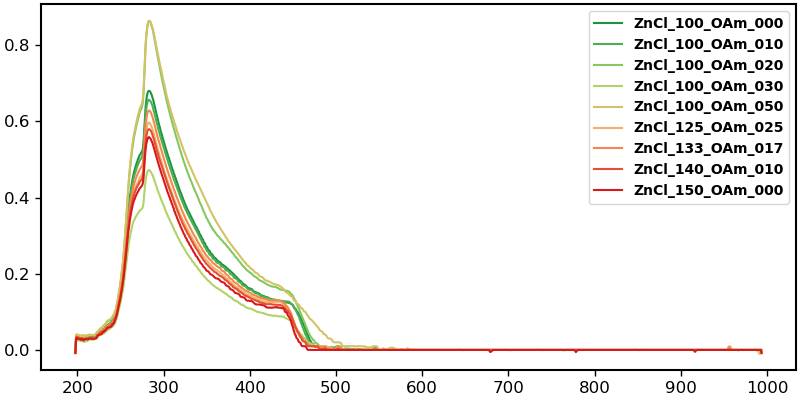

In [28]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

In [29]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
x_range=[750, 950]
idx0, v0 = find_nearest(x, x_range[0])
idx1, v1 = find_nearest(x, x_range[1])
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[700, 900])

In [30]:
# title.append('dummy')
# title.append('dummy')
# title.append('dummy')
title

['ZnCl_100_OAm_000_mean',
 'ZnCl_100_OAm_010_mean',
 'ZnCl_100_OAm_020_mean',
 'ZnCl_100_OAm_030_mean',
 'ZnCl_100_OAm_050_mean',
 'ZnCl_125_OAm_025_mean',
 'ZnCl_133_OAm_017_mean',
 'ZnCl_140_OAm_010_mean',
 'ZnCl_150_OAm_000_mean']

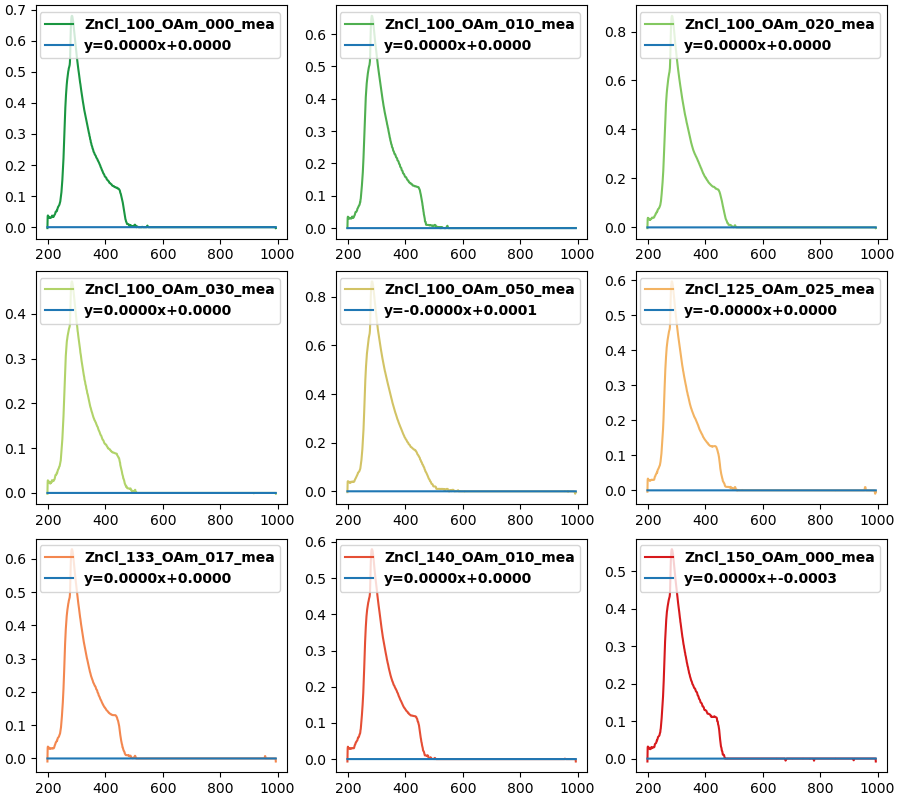

In [31]:
rows = 3
cols = 3
f3, ax3 = plt.subplots(rows, cols, figsize = (9, 8), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 0
id1 = -1
x_range_list = [[600, 900], [750, 950], 
                [750, 950], [800, 950], 
                [800, 950], [750, 950],
               ]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    try:
        x = df2[keys_list2[i*2]]
        y = df2[keys_list2[i*2+1]]
        popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[0], plot=False)
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
        ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
        df4[keys_list2[i*2]] = x
        # df4[keys_list2[i*2+1]] = y - popt[1]
        df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    
    except (KeyError, IndexError):
        pass

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

In [32]:
title = keys_list2[1::2]
title

['ZnCl_100_OAm_000_mean',
 'ZnCl_100_OAm_010_mean',
 'ZnCl_100_OAm_020_mean',
 'ZnCl_100_OAm_030_mean',
 'ZnCl_100_OAm_050_mean',
 'ZnCl_125_OAm_025_mean',
 'ZnCl_133_OAm_017_mean',
 'ZnCl_140_OAm_010_mean',
 'ZnCl_150_OAm_000_mean']

## Plot Abs by offset

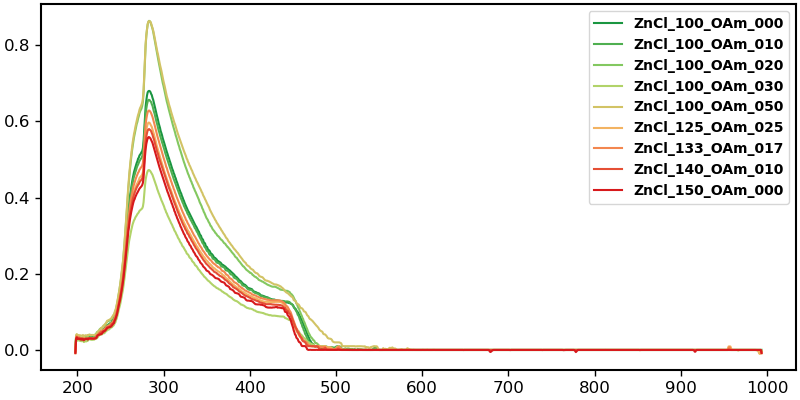

In [33]:
f4, ax4 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = -5

for i in range(len(title)):
    # ax4.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [34]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_ZnCl_100_OAm_000',
 'ZnCl_100_OAm_000_mean',
 'x_ZnCl_100_OAm_010',
 'ZnCl_100_OAm_010_mean',
 'x_ZnCl_100_OAm_020',
 'ZnCl_100_OAm_020_mean',
 'x_ZnCl_100_OAm_030',
 'ZnCl_100_OAm_030_mean',
 'x_ZnCl_100_OAm_050',
 'ZnCl_100_OAm_050_mean',
 'x_ZnCl_125_OAm_025',
 'ZnCl_125_OAm_025_mean',
 'x_ZnCl_133_OAm_017',
 'ZnCl_133_OAm_017_mean',
 'x_ZnCl_140_OAm_010',
 'ZnCl_140_OAm_010_mean',
 'x_ZnCl_150_OAm_000',
 'ZnCl_150_OAm_000_mean']

## Save offset data as csv

In [35]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

ZnCl_100_OAm_000_offset.csv
ZnCl_100_OAm_010_offset.csv
ZnCl_100_OAm_020_offset.csv
ZnCl_100_OAm_030_offset.csv
ZnCl_100_OAm_050_offset.csv
ZnCl_125_OAm_025_offset.csv
ZnCl_133_OAm_017_offset.csv
ZnCl_140_OAm_010_offset.csv
ZnCl_150_OAm_000_offset.csv


In [36]:
# df4.to_csv('20240227_quinine_Abs_offset.csv', index=False, sep=' ', float_format='{:.8e}'.format)

## Save Absorbance at 365 nm

In [37]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][1::2].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][1::2].to_list()
df_365

,Data_source,Abs_365,Abs_offset_365
0,ZnCl_100_OAm_000_mean,0.231515,0.231515
1,ZnCl_100_OAm_010_mean,0.226364,0.226364
2,ZnCl_100_OAm_020_mean,0.295455,0.295455
3,ZnCl_100_OAm_030_mean,0.158788,0.158788
4,ZnCl_100_OAm_050_mean,0.323333,0.323272
5,ZnCl_125_OAm_025_mean,0.204848,0.204842
6,ZnCl_133_OAm_017_mean,0.216061,0.216061
7,ZnCl_140_OAm_010_mean,0.195455,0.195455
8,ZnCl_150_OAm_000_mean,0.183939,0.184157


In [38]:
# df_365.to_csv(os.path.join(new_dir, 'quinine_300ms_sapphire_abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [39]:
# df_365.to_csv('quinine_300ms_sapphire_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

## Gaussian peak fitting

x_ZnCl_100_OAm_000 passes c1 so is good.

** Average of ZnCl_100_OAm_000_mean has peaks at [  6  85 194 216 243 263 289 312 332 361 388 432]**


** start to do peak fitting by Gaussian**

x_ZnCl_100_OAm_010 passes c1 so is good.

** Average of ZnCl_100_OAm_010_mean has peaks at [  6  81 193 216 237 257 289 312 332 364 388 412 432]**


** start to do peak fitting by Gaussian**

x_ZnCl_100_OAm_020 passes c1 so is good.

** Average of ZnCl_100_OAm_020_mean has peaks at [  6  87 198 237 257 289 312 332 361 384 412 432 517]**


** start to do peak fitting by Gaussian**

x_ZnCl_100_OAm_030 passes c1 so is good.

** Average of ZnCl_100_OAm_030_mean has peaks at [ 69 208 243 263 289 312 332 361 388 412 432]**


** start to do peak fitting by Gaussian**

x_ZnCl_100_OAm_050 passes c1 so is good.

** Average of ZnCl_100_OAm_050_mean has peaks at [  2  74 202 222 243 263 289 312 332 353 373 394 432 452 481 517]**


** start to do peak fitting by Gaussian**

x_ZnCl_125_OAm_025 passes c1 so is good.

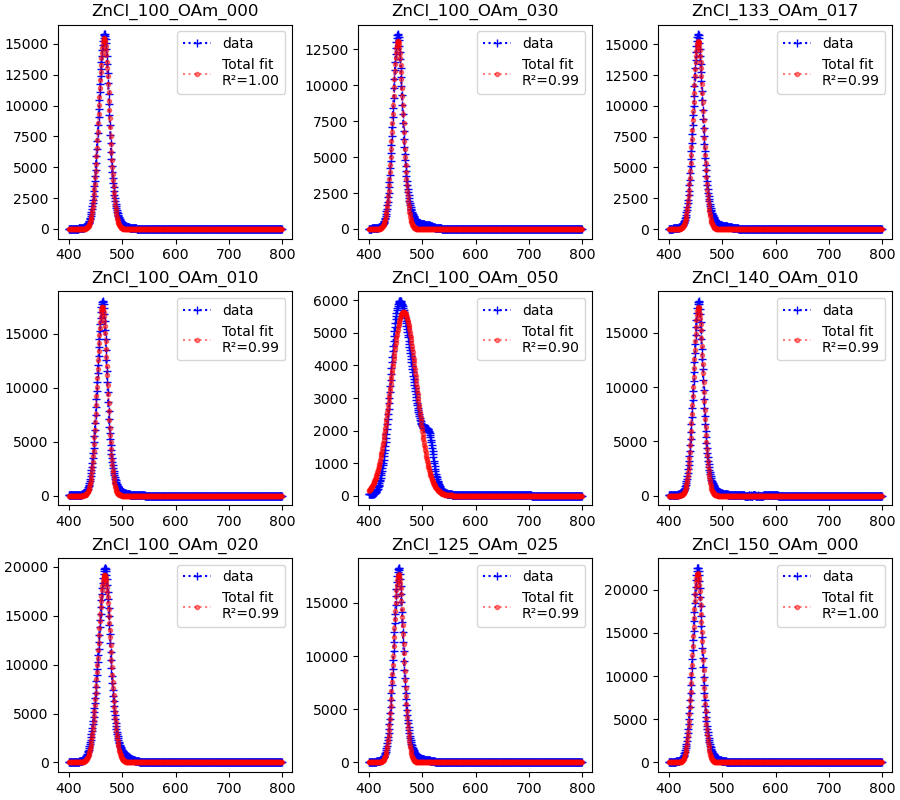

In [40]:
rows = 3
cols = 3
f5, ax5 = plt.subplots(rows, cols, figsize = (9, 8), constrained_layout=True)
# ax4 = ax4.flatten()
wl1 = 400
wl2 = 800
idx1, w1 = find_nearest(df[keys_list[0]], wl1)
idx2, w2 = find_nearest(df[keys_list[0]], wl2)

key_x_reshape = np.asarray(keys_list[0::2]).reshape(cols, rows).T
key_y_reshape = np.asarray(keys_list[1::2]).reshape(cols, rows).T

peak_list = []
fwhm = []
simpson_int = []

for i in range(cols):
    for j in range(rows):
        #i = 4
        try:
            x0 = df[key_x_reshape[j][i]][idx1:idx2].to_numpy()
            y0 = df[key_y_reshape[j][i]][idx1:idx2].to_numpy()
            #_2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(subfolder[i]))

            peak, prop = good_bad_data(x0, y0, key_height=1, data_id = f'{key_x_reshape[j][i]}', distance=20, height=1)
            x, y, p, f, popt = _fitting_in_kafka(x0, y0, f'{key_y_reshape[j][i]}', peak, prop)  


            simpson_int.append(integrate.simpson(y))
            peak_list.append(popt[1])
            fwhm.append(2.355*popt[2])


            fitted_result = f(x, *popt)
            r_2 = r_square(x, y, fitted_result)
            r2 = f'R\u00b2={r_2:.2f}'
            ax5[j][i].set_title(key_y_reshape[j][i][:-5])
            ax5[j][i].plot(x,y,'b+:',label='data')
            ax5[j][i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=3)

        #     # peak 1
        #     peak_1 = _1gauss(x, *popt[0:3])
        #     ax4[i].plot(x, peak_1, "g", label='peak 1')
        #     ax4[i].fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)

        #     # peak 2
        #     peak_2 = _1gauss(x, *popt[3:6])
        #     ax4[i].plot(x, peak_2, "y", label='peak 2')
        #     ax4[i].fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)

            ax5[j][i].legend()
        
        except (KeyError, IndexError):
            pass

Text(0.5, 0.98, 'Total rate: 350 $\\mu$L/min')

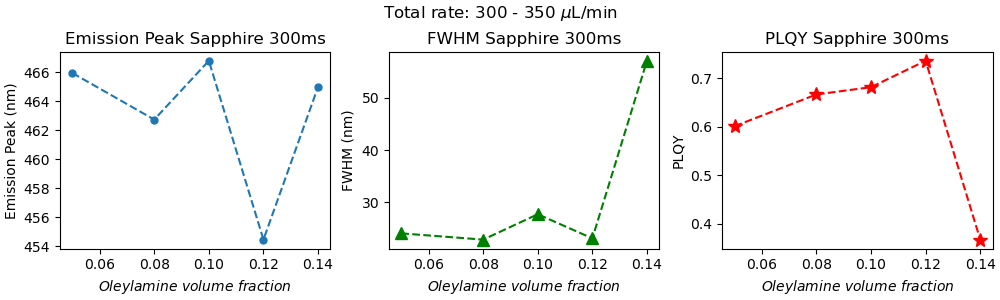

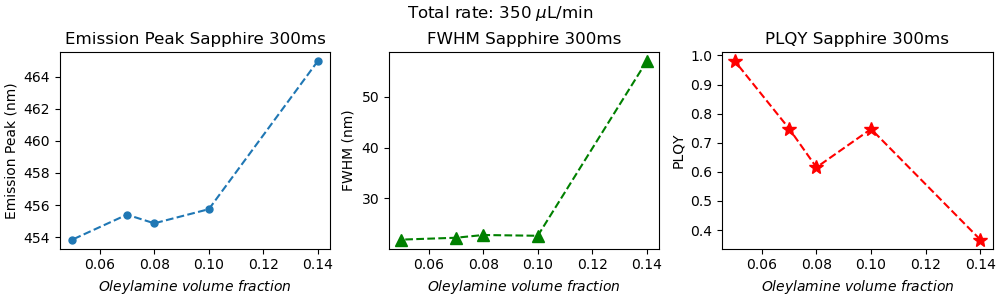

In [41]:
# abs_365 = df11.iloc[210][1::2].to_numpy()
abs_365 = df_365['Abs_offset_365']

abs_365_r = 0.360936  ##  20240227_quinine_plqy.ipynb: 5E-4M_300ms_mean
plqy_r = 0.546
ref_idx_toluene = 1.506
ref_idx_H2SO4 = 1.337
integral_r = 952628.240307  ##  20240227_quinine_plqy.ipynb: 5E-4M_300ms_mean
integral_pqds = np.asarray(simpson_int)

# plqy = plqy_quinine(abs_365, integral_pqds, 1.506, abs_365_r, integral_r, 1.337, 0.546)
# plqy_4000ms = plqy_quinine(abs_365, integral_pqds[1::2], 1.506, abs_365_r, integral_r[1], 1.337, 0.546)
plqy = plqy_quinine(abs_365, integral_pqds, ref_idx_toluene, abs_365_r, integral_r, ref_idx_H2SO4, plqy_r)
    
# x_list_T = np.asarray(x_list).reshape(cols, rows).T
# peak_list_T = np.asarray(peak_list).reshape(cols, rows).T
# fwhm_T = np.asarray(fwhm).reshape(cols, rows).T
# plqy_T = np.asarray(plqy).reshape(cols, rows).T

rows = 1
cols = 3
integration_time = ['Sapphire 300ms']

x_list = [0.05, 0.08, 0.10, 0.12, 0.14]
f6, ax6 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
# for i in range(rows):
ax6[0].set_title(f'Emission Peak {integration_time[0]}')
ax6[0].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax6[0].set_ylabel('Emission Peak (nm)')
ax6[1].set_title(f'FWHM {integration_time[0]}')
ax6[1].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax6[1].set_ylabel('FWHM (nm)')
ax6[2].set_title(f'PLQY {integration_time[0]}')
ax6[2].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax6[2].set_ylabel('PLQY')

ax6[0].plot(x_list, peak_list[:5], '.--', markersize=10)
ax6[1].plot(x_list, fwhm[:5], 'g^--', markersize=8)
ax6[2].plot(x_list, plqy[:5], 'r*--', markersize=10)
f6.suptitle(r'Total rate: 300 - 350 $\mu$L/min')

x_list2 = [0.14, 0.10, 0.08, 0.07, 0.05]
f7, ax7 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
# for i in range(rows):
ax7[0].set_title(f'Emission Peak {integration_time[0]}')
ax7[0].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax7[0].set_ylabel('Emission Peak (nm)')
ax7[1].set_title(f'FWHM {integration_time[0]}')
ax7[1].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax7[1].set_ylabel('FWHM (nm)')
ax7[2].set_title(f'PLQY {integration_time[0]}')
ax7[2].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax7[2].set_ylabel('PLQY')

ax7[0].plot(x_list2, peak_list[4:], '.--', markersize=10)
ax7[1].plot(x_list2, fwhm[4:], 'g^--', markersize=8)
ax7[2].plot(x_list2, plqy[4:], 'r*--', markersize=10)
f7.suptitle(r'Total rate: 350 $\mu$L/min')

## Plot data on 2024/06/21 togetheer

In [42]:
peak_list_0621 = [473.51617450472355,
 460.29646965403236,
 465.93625843820536,
 463.2264085128888,
 465.53959404586953,
 461.38193661130055,
 458.34162524859744,
 453.51716106455683,
 456.83243399910776]

fwhm_0621 = [26.996911457252633,
 26.104461547858897,
 24.530430088133137,
 34.2466436076652,
 49.90067413889271,
 35.828491356984514,
 28.883302738284485,
 25.749643771090152,
 23.43352408129822]

plqy_0621 = [0.463921, 
0.280036, 
0.439450, 
0.271469, 
0.221223, 
0.275775, 
0.344418, 
0.240351, 
0.365385]


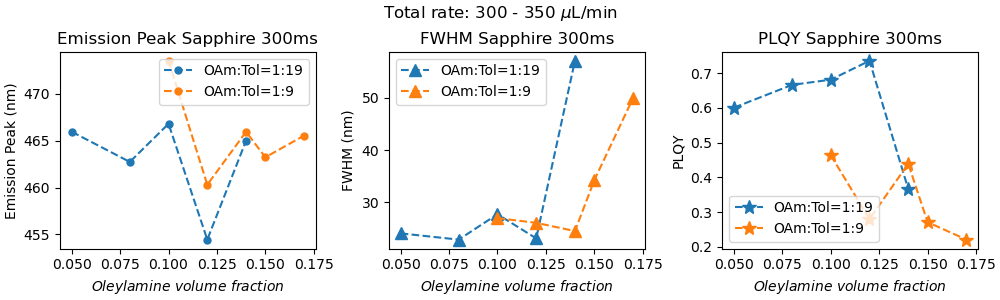

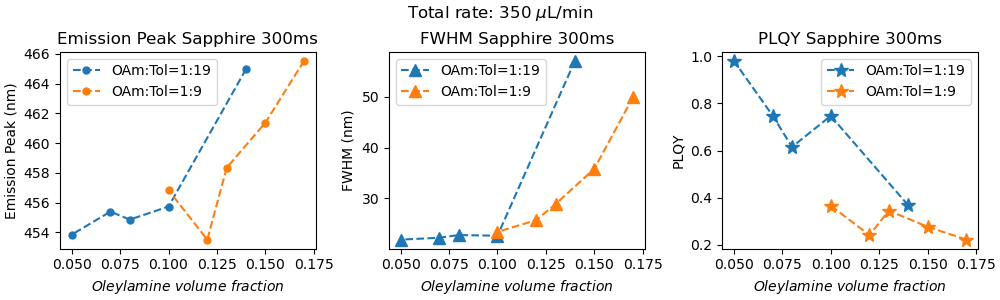

In [48]:
x_list_0621 = [0.10, 0.12, 0.14, 0.15, 0.17]
x_list = [0.05, 0.08, 0.10, 0.12, 0.14]
f8, ax8 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
# for i in range(rows):
ax8[0].set_title(f'Emission Peak {integration_time[0]}')
ax8[0].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax8[0].set_ylabel('Emission Peak (nm)')
ax8[1].set_title(f'FWHM {integration_time[0]}')
ax8[1].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax8[1].set_ylabel('FWHM (nm)')
ax8[2].set_title(f'PLQY {integration_time[0]}')
ax8[2].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax8[2].set_ylabel('PLQY')

# ax8[0].plot(x_list+x_list_0621, peak_list[:5]+peak_list_0621[:5], '.--', markersize=10)
# ax8[1].plot(x_list+x_list_0621, fwhm[:5]+fwhm_0621[:5], 'g^--', markersize=8)
# ax8[2].plot(x_list+x_list_0621, plqy[:5].to_list()+plqy_0621[:5], 'r*--', markersize=10)
ax8[0].plot(x_list, peak_list[:5], '.--', markersize=10, label='OAm:Tol=1:19')
ax8[1].plot(x_list, fwhm[:5], '^--', markersize=8, label='OAm:Tol=1:19')
ax8[2].plot(x_list, plqy[:5].to_list(), '*--', markersize=10, label='OAm:Tol=1:19')
ax8[0].plot(x_list_0621, peak_list_0621[:5], '.--', markersize=10, label='OAm:Tol=1:9')
ax8[1].plot(x_list_0621, fwhm_0621[:5], '^--', markersize=8, label='OAm:Tol=1:9')
ax8[2].plot(x_list_0621, plqy_0621[:5], '*--', markersize=10, label='OAm:Tol=1:9')
f8.suptitle(r'Total rate: 300 - 350 $\mu$L/min')
for i in range(3):
    ax8[i].legend()

x_list2_0621 = [0.17, 0.15, 0.13, 0.12, 0.10]
x_list2 = [0.14, 0.10, 0.08, 0.07, 0.05]
f9, ax9 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
# for i in range(rows):
ax9[0].set_title(f'Emission Peak {integration_time[0]}')
ax9[0].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax9[0].set_ylabel('Emission Peak (nm)')
ax9[1].set_title(f'FWHM {integration_time[0]}')
ax9[1].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax9[1].set_ylabel('FWHM (nm)')
ax9[2].set_title(f'PLQY {integration_time[0]}')
ax9[2].set_xlabel(r'$Oleylamine\ volume\ fraction$', fontdict={'size': 10})
ax9[2].set_ylabel('PLQY')

# ax9[0].plot(x_list2+x_list2_0621, peak_list[4:]+peak_list_0621[4:], '.--', markersize=10)
# ax9[1].plot(x_list2+x_list2_0621, fwhm[4:]+fwhm_0621[4:], 'g^--', markersize=8)
# ax9[2].plot(x_list2+x_list2_0621, plqy[4:].to_list()+plqy_0621[4:], 'r*--', markersize=10)
ax9[0].plot(x_list2, peak_list[4:], '.--', markersize=10, label='OAm:Tol=1:19')
ax9[1].plot(x_list2, fwhm[4:], '^--', markersize=8, label='OAm:Tol=1:19')
ax9[2].plot(x_list2, plqy[4:].to_list(), '*--', markersize=10, label='OAm:Tol=1:19')
ax9[0].plot(x_list2_0621, peak_list_0621[4:], '.--', markersize=10, label='OAm:Tol=1:9')
ax9[1].plot(x_list2_0621, fwhm_0621[4:], '^--', markersize=8, label='OAm:Tol=1:9')
ax9[2].plot(x_list2_0621, plqy_0621[4:], '*--', markersize=10, label='OAm:Tol=1:9')
f9.suptitle(r'Total rate: 350 $\mu$L/min')
for i in range(3):
    ax9[i].legend()

In [44]:
keys_list4[1::2]

['ZnCl_100_OAm_000_mean',
 'ZnCl_100_OAm_010_mean',
 'ZnCl_100_OAm_020_mean',
 'ZnCl_100_OAm_030_mean',
 'ZnCl_100_OAm_050_mean',
 'ZnCl_125_OAm_025_mean',
 'ZnCl_133_OAm_017_mean',
 'ZnCl_140_OAm_010_mean',
 'ZnCl_150_OAm_000_mean']

In [45]:
peak_list

[465.9455351211404,
 462.7300225708305,
 466.79127500009173,
 454.4418266370858,
 464.97997477877277,
 455.74273235958765,
 454.86160323680116,
 455.4011612770608,
 453.84756707942194]

In [46]:
fwhm

[24.089928950540664,
 22.898193946155704,
 27.7422290433254,
 23.13094374871344,
 57.03898212966035,
 22.672164613147917,
 22.820751302056628,
 22.282269982803754,
 21.916144069095008]

In [47]:
plqy

0    0.600696
1    0.666186
2    0.681165
3    0.735542
4    0.367035
5    0.747183
6    0.615268
7    0.748237
8    0.981617
Name: Abs_offset_365, dtype: float64